In [6]:
# https://github.com/mbustama/NuOscProbExact/blob/master/README.md#three-neutrino-oscillations-in-matter

from __future__ import print_function
import sys
sys.path.append('C:/Users/Bruger/BSc_project/NuOscProbExact/src')

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, colors
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable

import oscprob3nu
import hamiltonians3nu
from globaldefs import *

energy = 1.e9     # Neutrino energy [eV]
baseline = 1.3e3  # Baseline [km]

h_vacuum_energy_indep = \
    hamiltonians3nu.hamiltonian_3nu_vacuum_energy_independent(  S12_NO_BF,
                                                                S23_NO_BF,
                                                                S13_NO_BF,
                                                                DCP_NO_BF,
                                                                D21_NO_BF,
                                                                D31_NO_BF)

# Units of VCC_EARTH_CRUST: [eV]
h_matter = hamiltonians3nu.hamiltonian_3nu_matter(  h_vacuum_energy_indep,
                                                    energy,
                                                    VCC_EARTH_CRUST)

Pee, Pem, Pet, Pme, Pmm, Pmt, Pte, Ptm, Ptt = \
    oscprob3nu.probabilities_3nu(h_matter, baseline*CONV_KM_TO_INV_EV)

print("Pee = %6.5f, Pem = %6.5f, Pet = %6.5f" % (Pee, Pem, Pet))
print("Pme = %6.5f, Pmm = %6.5f, Pmt = %6.5f" % (Pme, Pmm, Pmt))
print("Pte = %6.5f, Ptm = %6.5f, Ptt = %6.5f" % (Pte, Ptm, Ptt))

Pee = 0.95262, Pem = 0.00623, Pet = 0.04115
Pme = 0.02590, Pmm = 0.37644, Pmt = 0.59766
Pte = 0.02148, Ptm = 0.61733, Ptt = 0.36119


In [2]:
def calcPathLength(cz,r=6371.,h=15.,d=1.) :
    '''
    cz = cos(zenith) in radians, to be converted to path length in km
    r = Radius of Earth, in km
    h = Production height in atmosphere, in km
    d = Depth of detector, in km
    '''
    return -r*cz +  np.sqrt( (r*cz)**2 - r**2 + (r+h+d)**2 )

In [9]:
dim = 200
energies = np.linspace(1, 100, dim)*10**9    # eV
log_energies = np.logspace(0,2, dim)*10**9
cos_thetas = np.linspace(-1, 1, dim)
path_lengths = calcPathLength(cos_thetas)

Pmm_matrix = np.zeros((dim, dim))

h_vacuum_energy_indep = \
    hamiltonians3nu.hamiltonian_3nu_vacuum_energy_independent(  S12_NO_BF,
                                                                S23_NO_BF,
                                                                S13_NO_BF,
                                                                DCP_NO_BF,
                                                                D21_NO_BF,
                                                              D31_NO_BF)


for e in range(dim):
    for l in range(dim):
    
        h_matter = hamiltonians3nu.hamiltonian_3nu_matter(  h_vacuum_energy_indep,
                                                            log_energies[e],
                                                            VCC_EARTH_CRUST)

        Pee, Pem, Pet, Pme, Pmm, Pmt, Pte, Ptm, Ptt = \
            oscprob3nu.probabilities_3nu(h_matter, path_lengths[l]*CONV_KM_TO_INV_EV)
        
        Pmm_matrix[l,e] = Pmm


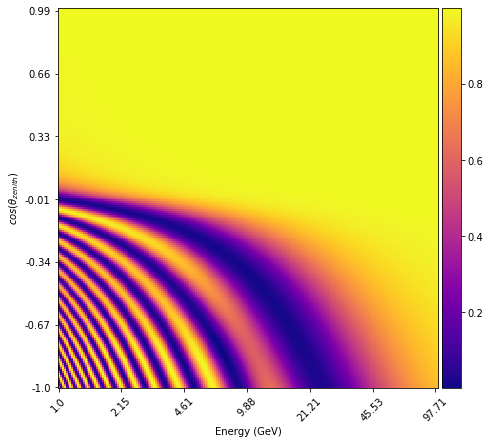

In [10]:
fig, ax = plt.subplots(figsize=(10,7))

im = ax.imshow(Pmm_matrix, cmap='plasma', norm = None, origin = 'lower')  #[:,0:200]
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

cbar = plt.colorbar(im, cax=cax)
ax.set_xlabel('Energy (GeV)')
ax.set_ylabel(r'$cos(\theta_{zenith})$')
ax.set_xticks(np.arange(0, dim, int(dim/6)))
ax.set_xticklabels([f'{np.round(log_energies[i]/10**9,2)}' for i in np.arange(0, dim, int(dim/6))], rotation=45)
ax.set_yticks(np.arange(0, dim, int(dim/6)))
ax.set_yticklabels([f'{np.round(cos_thetas[i],2)}' for i in np.arange(0, dim, int(dim/6))])
fig.savefig('Oscprob_mbustama');